### Wingbeats - Vorbereitung

+ Daten von https://www.kaggle.com/potamitis/wingbeats )

+ Notebook von https://www.kaggle.com/potamitis/the-wingbeat-signal , im folgenden angepasst und mit Anmerkungen versehen. 

+ Kommerzielle Umsetzung: https://remosis.bg-counter.com/

+ paper: E. Fanioudakis, M. Geismar and I. Potamitis, "Mosquito wingbeat analysis and classification using deep learning," 2018 26th European Signal Processing Conference (EUSIPCO), Rome, 2018, pp. 2410-2414.

Etwas Theorie (naiv ... :)

+ Fouriertransformation:  $F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} \,dt$
+ $F_T(\omega) = \frac{1}{\sqrt{T}}\int_{0}^{T} f(t) e^{-i\omega t} \,dt,$
+ $F_\tau (\omega) = \int_{-\infty}^{\infty} f(t) h(t-\tau)  e^{-i\omega t} \,dt$ mit Fensterfunktion $h$


+ energy spectral density: $|F(\omega)|^2$  (existiert nicht für stationäre Prozesse)
+ power spectral density: $\lim_{T\to \infty} |F_T(\omega)|^2$  (eigentlich Erwartungswert, $f$ Zufallsprozess)
+ spectrogram: $sp_h(\tau,\omega) = |F_\tau(\omega)|^2$ (quadrierte Short-Time-Fourier-Transform) 

----

**Some words on the signal characteristics of an insect’s wingbeat.**

In Figure 1 you see a typical example of a wingbeat snippet. The mosquito performed a free flight and was recorded using the optical device referenced in the Overview Section. You see a high frequency signal superimposed on a low frequency signal. The low frequency part is due to the main body movement, whereas the high frequency is due to the wingbeat alone.


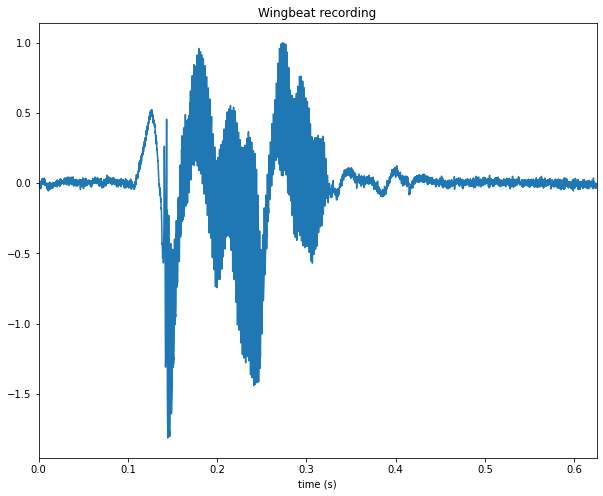

In [0]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile
import os
from scipy import signal

DATA_PATH   = "../../data/Wingbeats/"
SPECIES     = "Ae. aegypti/D_16_12_12_19_46_13/"
SAMPLE_NAME = "F161212_194613_156_G_050.wav"
FILE_NAME   = DATA_PATH + SPECIES + SAMPLE_NAME

fs, x = scipy.io.wavfile.read(FILE_NAME)

x = x/max(x)
X=10*np.log10(signal.welch(x, fs=fs, window='hanning', nperseg=256, noverlap=128+64)[1])

# Show one recording
plt.figure(figsize = (10,8))
plt.plot(np.linspace(0,len(x)/fs,len(x)),x)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('time (s)')
plt.title('Wingbeat recording')
plt.show()

Figure 1. A wingbeat recording. Time-domain representation.

If Figure 2 you see the power spectral density estimation of the wingbeat signal of Figure 1. That is, you see which frequencies compose the whole wingbeat signal. One can see significant power at the low frequencies close to 0 and up to 80 Hz. This is due to the main body movement. An object falling of the size of the mosquito would also have power around these frequencies. At around 550 Hz one can see the first peak. This corresponds to the wingbeating frequency of the insect (we will call it f0). If the mosquito would beat its wings for significantly long time in a way that the optical fluctuation was a perfect sinusoid then one would only see a single thin peak, Mr. Fourier says. The wings of the insect go up and shown but their shape and movement make a repetitive pattern that it is not a perfect sinusoid and Mr. Fourier, says again, that this is why the other peaks also appear (i.e. the so-called harmonics). Note that the harmonics appear at integer multiplies of the f0. The harmonic structure in practice, is not very thin for two reasons: a) the signal is short in time and, b) the insect does not pose to be photographed meaning that does not hold the same movement pattern indefinitely but rather performs manoeuvres and frequency modulated patterns as better seen in figure 3. Mosquitoes in particular, are capable of changing their higher harmonics during courtship. 

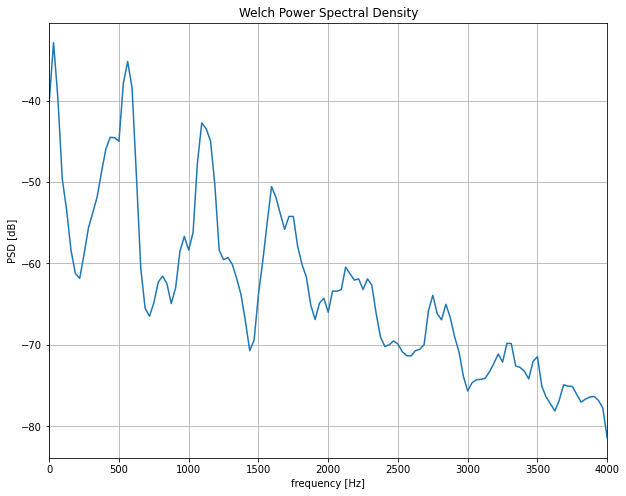

In [0]:
plt.figure(figsize = (10,8))
plt.plot(np.linspace(0,fs/2,129),X)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.title('Welch Power Spectral Density')
plt.show()

Figure 2. The frequency content of a wingbeat. Power Spectral Density estimation using the Welch method.

In Figure 3 we see a spectrogram of the same wingbeat (i.e. the frequency composition of the wingbeat as it changes over time). One can see the characteristic harmonic structure of the wingbeat and the modulation of the harmonics. In the recognition experiments using Deep networks the 2D representation performed better probably because the convolutional filters picked up the frequency modulated patterns that cannot be picked up by the PSD representation of Figure 2 as PSD integrates over time. 


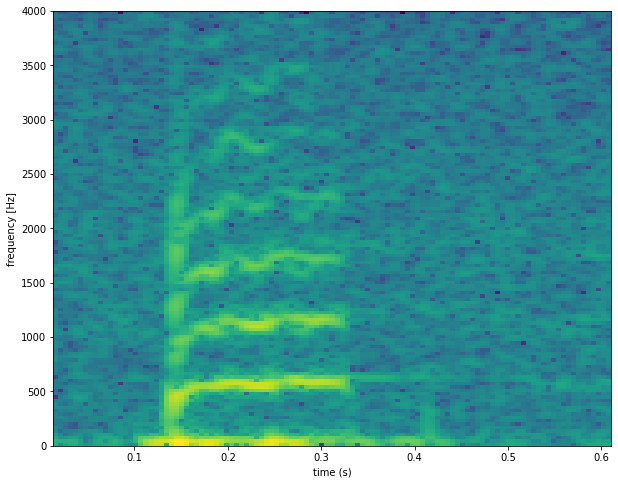

In [0]:
plt.figure(figsize = (10,8))
Pxx, freqs, bins, im = plt.specgram(x, NFFT=256, Fs=fs, noverlap=256-256/6)
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('time (s)')
plt.ylabel('frequency [Hz]')
plt.show()


Figure 3. A spectrogram of a wingbeat (i.e. a time-frequency representation).

### Nächste Schritte / ToDos
+ Gitlab-rep anlegen (Frank)

+ Paper von Potamis et al: nachvollziehen und Test der Klassifikationsmethode(n)  
  siehe auch https://www.kaggle.com/potamitis/wingbeats/kernels, als Startpunkt;

    + 1d CNN auf Signal anwenden  
    https://www.kaggle.com/left13/mxnet-cnn-1d-0-945-acc-full-set  
     Ähnliches Modell mit Tensorflow 2.0, Keras umsetzen     
     auf https://github.com/ecocurious/insectcounter ist unter /src/model/ eine gute Vorlage zum Start (Aus einen Studierendenprojekt Uni Saarbrücken, WiSe 19/20).

    + 2d CNN auf Spectogramm   
     https://www.kaggle.com/left13/various-nets-densenet121-0-96-acc-full-set  
    zur Berechnung der Spektogramme wird hier die Pythonbiliothek librosa verwendet (warum nicht scipy.signal?)   
    zumindest einige der Modelle mit Tensorflow 2.0, Keras umsetzen und testen.
    Auch andere inzwischen gängige Modelle (was auch immer momentan in keras verfügbar, your choice)
    man könne auch mit anderen Formaten für das Spektogramm experimentieren (mehr/weniger Bins ... )
    
+ Daten von  https://timeseriesclassification.com/dataset.php   ( Zeile InsectWingBeat) von UCR ; test für Tranferlearning

+ Eigene Modelle - insbesondere für 2d CNN: kleiner und abgespeckter, testen was noch funktioniert. Weitere Ideen: nur Feature-Extraction mit CNN, dann z.B. mit SVM klassizieren - das wird wichtig, wenn wir später Multisensordaten haben

+ Transfer auf eigene Daten

+ auch interessant (später mal): https://arxiv.org/pdf/1609.03499.pdf
